In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
pd.options.plotting.backend = 'plotly'

In [3]:
#https://www.kaggle.com/datasets/hemanthhari/psycological-effects-of-covid
df = pd.read_csv(r"C:\Users\nicho\Downloads\archive\psyco.csv")
df = df.replace('Dec-18','12-18')
df = df.groupby(by=['age','gender'])

df.head(3)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN


In [22]:
gender_age_grouped = (df
.drop(columns=['occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work'])
.groupby(by=['age','gender'])
.mean())

In [74]:
# # Group the dataset by 'age' and calculate the mean for 'time_bp' and 'time_dp'
# grouped_data_age = df.groupby('age')[['time_bp', 'time_dp']].mean().reset_index()

# # Create double bar graph
# fig, ax = plt.subplots(figsize=(10, 7))

# # Create an x location for each age group
# x = np.arange(len(grouped_data_age['age']))

# # Define bar width
# bar_width = 0.35

# # Create bars for each age group for 'time_bp' and 'time_dp'
# bar1 = ax.bar(x - bar_width/2, grouped_data_age['time_bp'], width=bar_width, label='Time before pandemic')
# bar2 = ax.bar(x + bar_width/2, grouped_data_age['time_dp'], width=bar_width, label='Time during pandemic')

# # Set labels and title
# ax.set_xlabel('Age Group')
# ax.set_ylabel('Average Time')
# ax.set_title('Average Time Spent Before and During Pandemic by Age Group')
# ax.set_xticks(x)
# ax.set_xticklabels(grouped_data_age['age'])
# ax.legend()

# # Show the plot
# plt.show()


In [72]:
sns_grouped_age_data = grouped_data_age
sns_grouped_age_data = sns_grouped_age_data.stack().reset_index()
sns_grouped_age_data = sns_grouped_age_data.rename({'age':'Age','level_1':'Pandemic',0:'Hours Working Daily'}, axis=1)
sns_grouped_age_data = sns_grouped_age_data.replace({'time_bp':'Before','time_dp':'During'})
sns_grouped_age_data

,Age,Pandemic,Hours Working Daily
0,12-18,Before,6.662162
1,12-18,During,5.702703
2,19-25,Before,6.985507
3,19-25,During,6.794203
4,26-32,Before,7.662835
5,26-32,During,9.371648
6,33-40,Before,7.088235
7,33-40,During,7.382353
8,40-50,Before,8.447514
9,40-50,During,8.690608


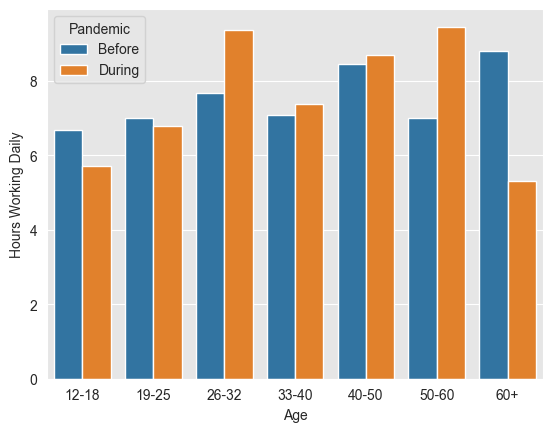

In [73]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot = sns.barplot(x='Age',y='Hours Working Daily',hue='Pandemic', data=sns_grouped_age_data)


TypeError: bar() got an unexpected keyword argument 'rot'